In [4]:
from imgann import Sample
import pandas as pd
import os

## Download

In [6]:
def download_unzip(url, output_path):
  os.makedirs(folder, exist_ok=True)
  os.system(f'wget -O {output_path}.zip {url}')
  os.system(f'unzip {output_path}.zip -d {output_path}')

# Download data ... Will take a while!
download_url = 'https://fishnet-data.s3-us-west-1.amazonaws.com/foid_images_v100.zip'
folder = '../downloads'
dataset_name = 'fishnet'
local_path = f'{folder}/{dataset_name}'
download_unzip(download_url, local_path)

# Download annotations
annotation_folder = f'{folder}/{dataset_name}_annotations'
download_unzip('https://fishnet-data.s3-us-west-1.amazonaws.com/foid_labels_v100.zip', annotation_folder)

## Visualise

In [7]:
format = 'csv'
annotation_path = os.path.join(annotation_folder, 'foid_labels_v100.csv')
new_annotation_path = os.path.join(annotation_folder, 'foid_labels_v100_new.csv')

# Update annotations to respect image imgann format
annotations_df = pd.read_csv(annotation_path)
annotations_df.rename(columns={'img_id': 'filename'}, inplace=True)
annotations_df.rename(columns={'label_l1': 'class'}, inplace=True)
annotations_df.rename(columns={'x_min': 'xmin'}, inplace=True)
annotations_df.rename(columns={'x_max': 'xmax'}, inplace=True)
annotations_df.rename(columns={'y_min': 'ymin'}, inplace=True)
annotations_df.rename(columns={'y_max': 'ymax'}, inplace=True)
annotations_df['filename'] = annotations_df['filename'].apply(lambda x: f'{x}.jpg')
# create dummy height and width columns with values 1980 and 1080
annotations_df['height'] = 1920
annotations_df['width'] = 1080

annotations_df.to_csv(new_annotation_path, index=False)


INFO:imgann.sample:
                            IMAGE ANNOTATION SUMMARY                            
number of images         : 143818
folder image counts      :
                         > images : 143818
number of image sizes    : 1
image_size               : 1080 X 1980
number of object classes : 34
object classes           : Human | Unknown | Albacore | Yellowfin tuna | Shortbill spearfish | Opah | Swordfish | Skipjack tuna | Wahoo | No fish | Mahi mahi | Bigeye tuna | Indo Pacific sailfish | Blue marlin | Striped marlin | Pomfret | Great barracuda | Tuna | Oilfish | Sickle pomfret | Pelagic stingray | Shark | Marlin | Escolar | Long snouted lancetfish | Lancetfish | Black marlin | Roudie scolar | Water | Thresher shark | Mola mola | Brama | Snake mackerel | Rainbow runner
number of objects        : 549209
class object count       :
                         > Human                   : 281040
                         > Unknown                 : 6779
                         > Albacor

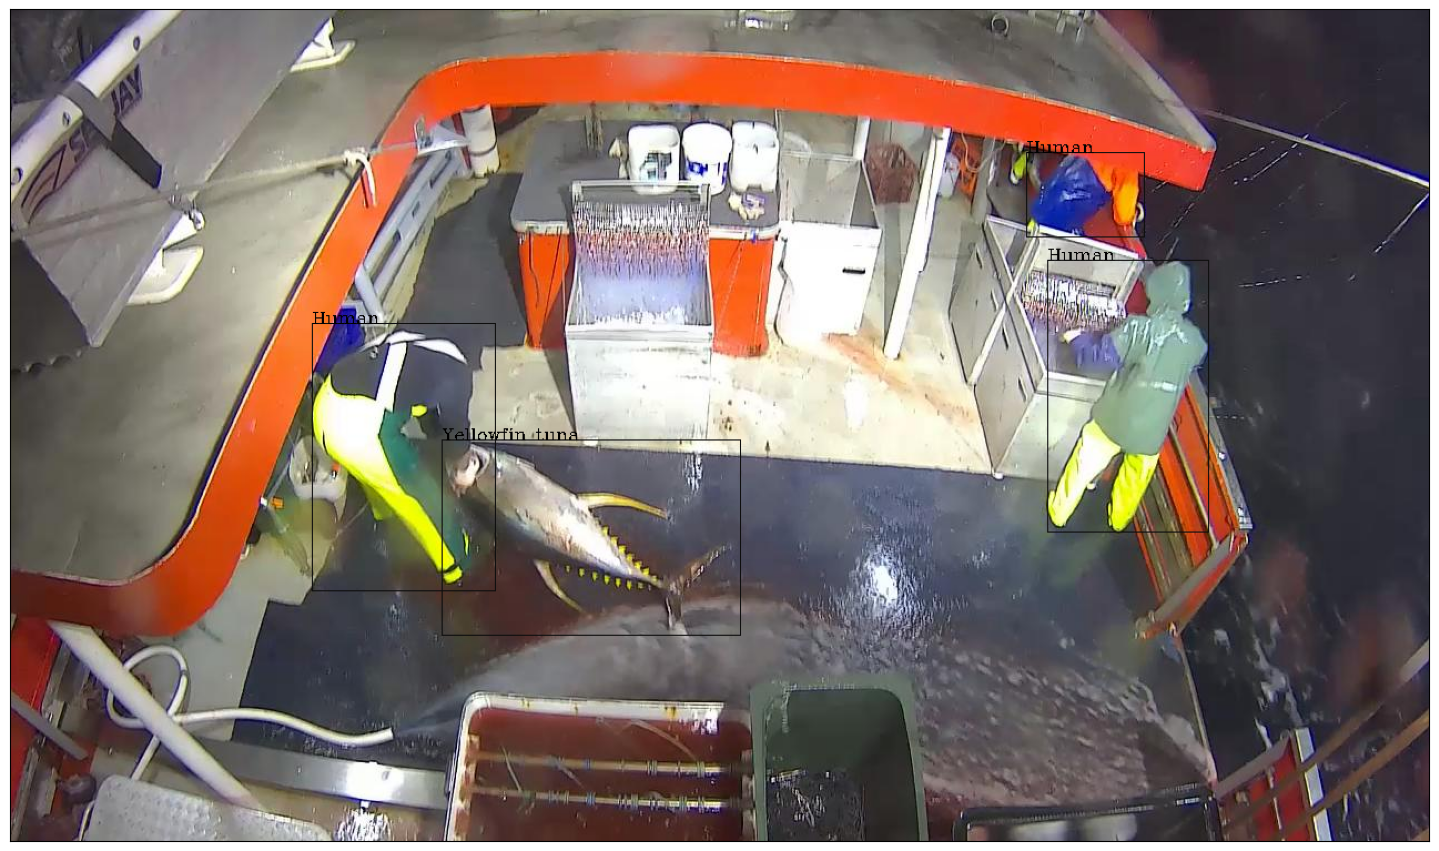

In [15]:
Sample.describe_ann(
  data_path = os.path.join(local_path, 'images'),
  ann_path = new_annotation_path,
  ann_type = format
)

Sample.show_samples(
  data_path = os.path.join(local_path, 'images'),
  ann_path = new_annotation_path,
  num_of_samples = 1,
  ann_type = format,
  image_shape=[1920, 1080]
)